In [78]:
import scipy as sp
import pandas as pd
import numpy as np
from scipy import signal
from numpy.random import default_rng
import matplotlib.pyplot as plt
import math

In [79]:
data = pd.read_csv('Data.csv') #import data from fed as pandas dataframe
data.rename(index={1: "GDP"})
data_n = np.array(data) #change to numpy array

In [80]:
y = data_n[:,1]
y=np.log(y.astype('float64'))


In [81]:
yc_linear =signal.detrend(y)
yg_linear = y - yc_linear
T=len(y)

## US Real GDP per Capita vs Linear Trend

Text(0.5, 1.0, 'US Real Log GDP per Capita vs Linear Trend')

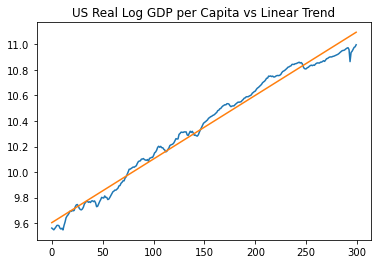

In [82]:
plt.plot(y)
plt.plot(yg_linear)
plt.title('US Real Log GDP per Capita vs Linear Trend')

## Average Growth Rate of GDP per Capita

In [83]:
length = list(range(2,T))
Growth_r = []
for i in length:
    Growth_r.append(y[i]-y[i-1])
    
Avg_Growth_r = np.mean(Growth_r)
Avg_Growth_r


0.004839742862394625

## Cyclical Component 

Text(0.5, 1.0, 'Cyclical Component of Real GDP per Capita')

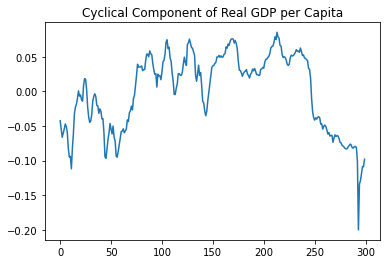

In [84]:
yc_linear
plt.plot(yc_linear)
plt.title('Cyclical Component of Real GDP per Capita')

#### Statistics for Cyclical Component

In [85]:
Mean_yc = np.mean(yc_linear)
Mean_yc # Basically 0 as expected.

-8.881784197001252e-16

In [86]:
Var_yc = sum((yc_linear - Mean_yc)**2)/(T)
Std_yc = np.sqrt(Var_yc)
Std_yc

0.05473945821104255

In [87]:
#First Sample Autocorrelation
Acorr = np.correlate(yc_linear,yc_linear)
Acorr

array([0.89892249])

Linear Detrending doesn't perfectly detrend and minimize the difference between cycle and trend. A straight line cannot do this. Regardless, here we get a better view of GDP without the cyclical component. 